# SFSC curve of empiar10311_stack_crop.mrc

In [70]:
#import mrcfile
import matplotlib.pyplot as plt
#import tifffile
#import scipy.ndimage
import numpy as np
import skimage.io
import denoising.utils as utils # pip install --upgrade --force-reinstall "denoising @ git+https://github.com/vicente-gonzalez-ruiz/denoising"
from self_fourier_shell_correlation import fsc_utils as fsc # pip install --upgrade --force-reinstall "self_fourier_shell_correlation @ git+https://github.com/vicente-gonzalez-ruiz/self_fourier_shell_correlation"

In [26]:
vol_name = "phantom01"
vol_extension = ".tif"
vols_path = "/shared/vols/"

In [27]:
from collections import namedtuple # Comes with the PSL
Args = namedtuple("args", ["vol"])
args = Args(vols_path + vol_name + vol_extension)

In [28]:
#with mrcfile.open(args.vol, permissive=True) as mrc:
#    vol= mrc.data

In [62]:
vol = skimage.io.imread(args.vol, plugin="tifffile").astype(np.float32)

In [63]:
vol.shape

(51, 512, 512)

In [64]:
vol = vol[0:48, 100:148, 100:148]

In [65]:
vol.shape

(48, 48, 48)

In [88]:
np.max(vol)

np.float32(0.6546284)

In [89]:
np.min(vol)

np.float32(0.00093097216)

In [66]:
#Z_dim = vol.shape[0]
#Z2 = Z_dim//2
#plt.imshow(vol[Z2], cmap="gray")

In [67]:
freq, c_avg = fsc.get_SFSC_curve(vol)

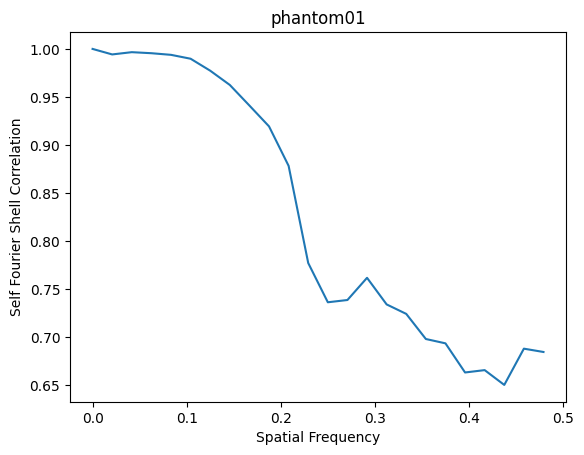

In [68]:
plt.title(vol_name)
plt.xlabel("Spatial Frequency")
plt.ylabel("Self Fourier Shell Correlation")
plt.plot(freq, c_avg)
plt.savefig(vol_name + ".svg")
plt.show()

In [100]:
curve = []
sigmas = range(0, 100, 10)
N = 10
for i in sigmas:
    total_c_avg = 0
    for j in range(N):
        noise = utils.gaussian_noise(vol.shape, sigma=i/100)
        noisy_vol = vol + noise
        freq, c_avg = fsc.get_SFSC_curve(noisy_vol)
        total_c_avg += c_avg
    curve.append(total_c_avg/N)
    print(i, end=' ')

0 10 20 30 40 50 60 70 80 90 

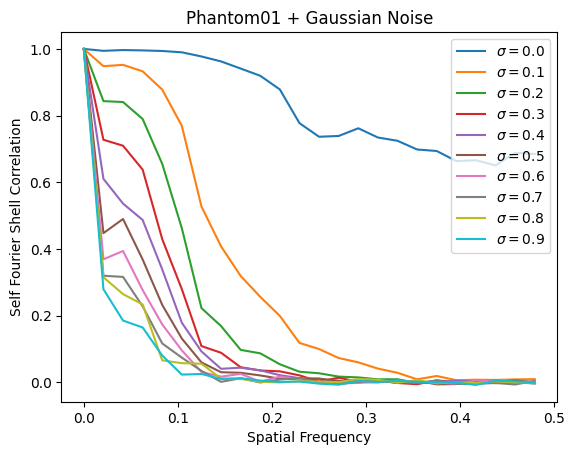

In [101]:
plt.title("Phantom01 + Gaussian Noise")
plt.xlabel("Spatial Frequency")
plt.ylabel("Self Fourier Shell Correlation")
for i in range(len(sigmas)):
    plt.plot(freq, curve[i], label=f"$\sigma={sigmas[i]/100}$")
plt.legend(loc='upper right')
plt.savefig("Gaussian_noise.svg")
plt.show()

Noise reduces the maximum spatial frequency that can be discerned.